<a href="https://colab.research.google.com/github/mukul-mschauhan/Machine-Learning-Projects/blob/master/PreTrained_VGG_NET_on_CIFAR_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Example of Pre_trained VGG Net

VGG16 is a deep learning model trained on ImageNet, a dataset of over **14 million images across 1,000 different classes**  (like "Golden Retriever," "Laptop," or "Coffee Mug").

When we initialize this, it typically downloads the pre-trained weights (the "knowledge" of the model) so that we can classify images immediately without training it ourself.

### About PreTrained Models

A Pre-trained Model is a saved network that was previously trained on a large-scale dataset (typically ImageNet, which contains over 14 million images). Instead of building a neural network from scratch, we use one that has **already "learned" how to recognize shapes, textures, and objects.**

Training a deep model from scratch requires thousands of high-quality images and massive computing power (GPUs) that can take days or weeks. A pre-trained model can be loaded in seconds.

In [1]:
!pip install -qU tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 708.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 85.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 115.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 115.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.0/225.0 kB 18.9 MB/s eta 0:00:00


In [2]:
import tensorflow as tf

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


In [4]:
model = VGG16(weights = "imagenet", include_top = True,
              input_shape = (224, 224, 3))

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [6]:
# Lets load the image

img = load_img("/content/istockphoto-1477683654-612x612.jpg", target_size=(224, 224))

# img_to_array(img)

array([[[ 45,  42,  53],
        [ 45,  42,  53],
        [ 45,  42,  53],
        ...,
        [ 54,  47,  55],
        [ 54,  47,  55],
        [ 53,  50,  57]],

       [[ 45,  42,  53],
        [ 45,  42,  53],
        [ 45,  42,  53],
        ...,
        [ 54,  47,  55],
        [ 55,  48,  56],
        [ 53,  50,  57]],

       [[ 45,  42,  53],
        [ 45,  42,  53],
        [ 45,  42,  53],
        ...,
        [ 55,  48,  56],
        [ 56,  49,  57],
        [ 53,  50,  57]],

       ...,

       [[ 74,  42,  19],
        [ 50,  29,  12],
        [ 51,  37,  24],
        ...,
        [179, 114,  84],
        [173, 104,  73],
        [144,  87,  68]],

       [[146,  82,  44],
        [ 99,  50,  20],
        [ 75,  38,  12],
        ...,
        [167, 111,  84],
        [168, 102,  78],
        [164, 106,  82]],

       [[156,  93,  52],
        [152,  85,  42],
        [169, 101,  56],
        ...,
        [136,  81,  60],
        [176, 113,  95],
        [176, 118,  98]]], dtype=uint8)
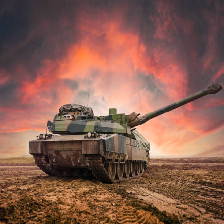

In [7]:
import numpy as np
np.array(img)

In [8]:
# Converting the Image Pixels into Numpy array:
# Prepare an image
tank = img_to_array(img)


# reshaping the image (resize it to 224x224 first)

# This adds an extra dimension to the beginning of the array, changing its shape from (224, 224, 3) to (1, 224, 224, 3).
tank_array = tank.reshape((1, tank.shape[0], tank.shape[1], tank.shape[2]))

# The first number (1) represents the number of images in your "batch."
# Without this "batch dimension," the model will throw an error because it expects a 4D input

# Preprocess the Image
tank_processed =  preprocess_input(tank_array)

In [9]:
# Lets use the model to predict it

yhat = model.predict(tank_processed)
label = decode_predictions(yhat) # Generate labels...

print(label)

# By default, it retrieves the top 5 most likely categories.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
[[('n04389033', 'tank', np.float32(0.98715055)), ('n02704792', 'amphibian', np.float32(0.004706964)), ('n04008634', 'projectile', np.float32(0.0032215796)), ('n02950826', 'cannon', np.float32(0.0017357386)), ('n03773504', 'missile', np.float32(0.0015734045))]]


In [10]:
labels = label[0][0]

print(f'''{labels[1]} : ({np.round(labels[2]*100, 4)})''')

tank : (98.71510314941406)


# Task
Evaluate the pre-trained VGG16 model on the CIFAR10 dataset, analyze its predictions, and explain the challenges in calculating a meaningful accuracy score due to the class mismatch between ImageNet and CIFAR10.

## Prepare CIFAR10 Validation Data

### Subtask:
Convert the PyTorch `val_subset` dataset to a format compatible with the Keras VGG16 model. This involves iterating through the dataset, converting each PyTorch tensor image to a NumPy array, resizing it from 32x32 to 224x224 pixels (VGG16 input size), and applying the VGG16-specific `preprocess_input` function. Store the preprocessed images and their corresponding true CIFAR10 labels.


In [11]:
# Downloading CIFAR Dataset
import torchvision

import torchvision.transforms as transforms

# Define transformations - Converts images into arrays and apply pixel scaling [0, 1]
transform = transforms.Compose([transforms.ToTensor()])


train = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
test  = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)

100%|██████████| 170M/170M [00:03<00:00, 49.0MB/s]


“PyTorch → NumPy → PIL → Keras preprocessing” pipeline

PyTorch Tensor (C, H, W)
→ NumPy
→ HWC format
→ uint8 [0–255]
→ PIL Image
→ Resize to 224×224
→ NumPy batch
→ preprocess_input (ImageNet normalization)

## Validation Set

In [12]:
# Validation Set
import torch
from torch.utils.data import random_split

# Define the sizes: 45,000 for training, 5,000 for validation
train_size = 45000
val_size = 5000

# Perform the split
train_subset, val_subset = random_split(train, [train_size, val_size])

In [13]:
from PIL import Image

val_images_processed = []
val_labels = []

for img_tensor, label in val_subset:
    # a. Convert PyTorch tensor to NumPy array (C, H, W)
    img_np = img_tensor.cpu().numpy()

    # b. Transpose axes from (C, H, W) to (H, W, C)
    img_np_transposed = np.transpose(img_np, (1, 2, 0))

    # c. Scale pixel values to [0, 255] and convert to uint8
    img_scaled = (img_np_transposed * 255).astype(np.uint8)

    # d. Create a PIL Image object from the NumPy array
    img_pil = Image.fromarray(img_scaled)

    # e. Resize the PIL image to (224, 224) pixels
    img_resized_pil = img_pil.resize((224, 224))

    # f. Convert the resized PIL image back into a NumPy array
    img_resized_np = np.array(img_resized_pil)

    # g. Expand the dimensions to create a batch dimension (1, 224, 224, 3)
    img_expanded = np.expand_dims(img_resized_np, axis=0)

    # h. Apply the preprocess_input function
    img_preprocessed = preprocess_input(img_expanded)

    # i. Append the preprocessed image (removing the batch dimension) and label
    val_images_processed.append(img_preprocessed[0]) # Remove the batch dimension
    val_labels.append(label)

# Convert lists to NumPy arrays
val_images_processed = np.array(val_images_processed)
val_labels = np.array(val_labels)

print(f"Shape of preprocessed validation images: {val_images_processed.shape}")
print(f"Shape of validation labels: {val_labels.shape}")

Shape of preprocessed validation images: (5000, 224, 224, 3)
Shape of validation labels: (5000,)


## Predict on Validation Set

### Subtask:
Use the pre-trained Keras `model` (VGG16) to make predictions on the prepared validation images.


**Reasoning**:
The subtask requires using the pre-trained VGG16 model to make predictions on the processed validation images and then decoding those predictions.



In [14]:
val_predictions = model.predict(val_images_processed)
decoded_val_predictions = decode_predictions(val_predictions)

print(f"Shape of raw predictions (val_predictions): {val_predictions.shape}")
print(f"Length of decoded predictions (decoded_val_predictions): {len(decoded_val_predictions)}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 942s 6s/step
Shape of raw predictions (val_predictions): (5000, 1000)
Length of decoded predictions (decoded_val_predictions): 5000


### Test Set

In [15]:
test_images_processed = []
test_labels = []

for img_tensor, label in test:
    # a. Convert PyTorch tensor to NumPy array (C, H, W)
    img_np = img_tensor.cpu().numpy()

    # b. Transpose axes from (C, H, W) to (H, W, C)
    img_np_transposed = np.transpose(img_np, (1, 2, 0))

    # c. Scale pixel values to [0, 255] and convert to uint8
    img_scaled = (img_np_transposed * 255).astype(np.uint8)

    # d. Create a PIL Image object from the NumPy array
    img_pil = Image.fromarray(img_scaled)

    # e. Resize the PIL image to (224, 224) pixels
    img_resized_pil = img_pil.resize((224, 224))

    # f. Convert the resized PIL image back into a NumPy array
    img_resized_np = np.array(img_resized_pil)

    # g. Expand the dimensions to create a batch dimension (1, 224, 224, 3)
    img_expanded = np.expand_dims(img_resized_np, axis=0)

    # h. Apply the preprocess_input function
    img_preprocessed = preprocess_input(img_expanded)

    # i. Append the preprocessed image (removing the batch dimension) and label
    test_images_processed.append(img_preprocessed[0]) # Remove the batch dimension
    test_labels.append(label)

# Convert lists to NumPy arrays
test_images_processed = np.array(test_images_processed)
test_labels = np.array(test_labels)

print(f"Shape of preprocessed test images: {test_images_processed.shape}")
print(f"Shape of test labels: {test_labels.shape}")

Shape of preprocessed test images: (10000, 224, 224, 3)
Shape of test labels: (10000,)


## Predict on Test Set

### Subtask:
Use the pre-trained Keras `model` (VGG16) to make predictions on the prepared test images.


**Reasoning**:
The subtask requires using the pre-trained Keras model to make predictions on the processed test images and then decoding those predictions, which will be achieved by using the `model.predict` and `decode_predictions` functions.



In [16]:
test_predictions = model.predict(test_images_processed)
decoded_test_predictions = decode_predictions(test_predictions)

print(f"Shape of raw predictions (test_predictions): {test_predictions.shape}")
print(f"Length of decoded predictions (decoded_test_predictions): {len(decoded_test_predictions)}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1871s 6s/step
Shape of raw predictions (test_predictions): (10000, 1000)
Length of decoded predictions (decoded_test_predictions): 10000


## Predict on Test Set (Retry)

### Subtask:
Use the pre-trained Keras `model` (VGG16) to make predictions on the prepared test images.


**Reasoning**:
The subtask requires using the pre-trained Keras model to make predictions on the processed test images and then decoding those predictions, which will be achieved by using the `model.predict` and `decode_predictions` functions, followed by printing their shapes and lengths.



# Task
Analyze sample predictions from both the CIFAR10 validation and test sets. For each sample, display the original CIFAR10 image, its true CIFAR10 label, and the top 5 predicted ImageNet labels from the VGG16 model with their confidence scores. This will visually demonstrate the class mismatch and set the stage for explaining the challenges in calculating a meaningful accuracy score.

## Analyze Sample Predictions

### Subtask:
Select a few sample images from the CIFAR10 validation and test sets. For each sample, display the original CIFAR10 image, its true CIFAR10 label, and the top 5 predicted ImageNet labels from the VGG16 model with their confidence scores. This will visually demonstrate the class mismatch.


**Reasoning**:
First, I need to define the CIFAR10 class names and import `matplotlib.pyplot` to prepare for displaying images and their predictions. This is a foundational step before creating the helper function and sampling images.



In [17]:
cifar10_class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

import matplotlib.pyplot as plt

print("CIFAR10 class names defined and matplotlib.pyplot imported.")

CIFAR10 class names defined and matplotlib.pyplot imported.


**Reasoning**:
Following the instructions, I need to create a helper function `display_sample_predictions` that will display the original image, its true CIFAR10 label, and the top 5 ImageNet predictions with their confidence scores. This function will encapsulate the display logic.



In [18]:
def display_sample_predictions(original_img_tensor, true_label_idx, decoded_predictions, dataset_name=""):
    # a. Convert PyTorch tensor to NumPy array (C, H, W) and then to (H, W, C)
    img_np = original_img_tensor.cpu().numpy()
    img_np_transposed = np.transpose(img_np, (1, 2, 0))

    # Scale pixel values to [0, 255] for display if they are floats [0,1]
    if img_np_transposed.max() <= 1.0:
        img_display = (img_np_transposed * 255).astype(np.uint8)
    else:
        img_display = img_np_transposed.astype(np.uint8)

    plt.figure(figsize=(8, 4))
    plt.imshow(img_display)

    # c. Set the plot title
    true_label_name = cifar10_class_names[true_label_idx]
    plt.title(f"True CIFAR10 Label: {true_label_name.upper()} ({dataset_name})")
    plt.axis('off')

    # d. Print the top 5 ImageNet predictions
    print(f"\n--- Predictions for {dataset_name} Sample (True Label: {true_label_name.upper()}) ---")
    print("Top 5 ImageNet Predictions:")
    for i, (imagenet_id, imagenet_label, confidence) in enumerate(decoded_predictions[:5]):
        print(f"  {i+1}. {imagenet_label}: {confidence*100:.2f}%")
    plt.show()

print("Helper function `display_sample_predictions` defined.")

Helper function `display_sample_predictions` defined.


**Reasoning**:
Now, I will select a few random indices from the validation set and use the `display_sample_predictions` helper function to visualize the original CIFAR10 image, its true label, and the top 5 ImageNet predictions by VGG16. This will illustrate the class mismatch.



Displaying 3 samples from the CIFAR10 Validation Set:

--- Predictions for Validation Sample 1 Sample (True Label: TRUCK) ---
Top 5 ImageNet Predictions:
  1. moving_van: 61.05%
  2. trailer_truck: 24.33%
  3. chain_saw: 1.96%
  4. ambulance: 1.43%
  5. amphibian: 1.16%


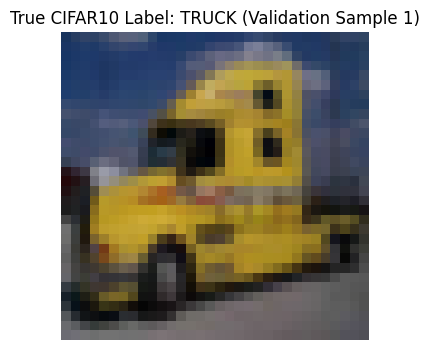


--- Predictions for Validation Sample 2 Sample (True Label: SHIP) ---
Top 5 ImageNet Predictions:
  1. speedboat: 23.59%
  2. airliner: 11.01%
  3. bobsled: 7.77%
  4. ski: 5.50%
  5. amphibian: 2.54%


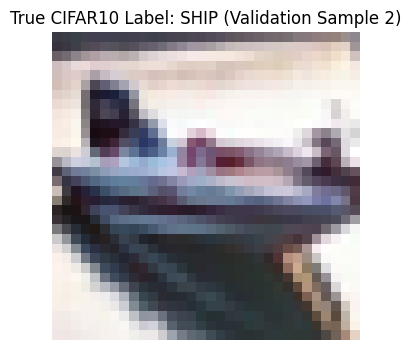


--- Predictions for Validation Sample 3 Sample (True Label: CAT) ---
Top 5 ImageNet Predictions:
  1. Indian_elephant: 14.60%
  2. African_elephant: 7.65%
  3. patas: 4.05%
  4. tusker: 3.73%
  5. fox_squirrel: 3.33%


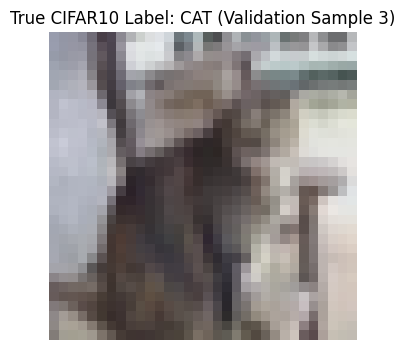

In [19]:
import random

# Select a few random indices (e.g., 3-5) from the validation set
num_samples_to_display = 3
validation_indices = random.sample(range(len(val_subset)), num_samples_to_display)

print(f"Displaying {num_samples_to_display} samples from the CIFAR10 Validation Set:")
for i, idx in enumerate(validation_indices):
    # Retrieve the original image tensor and true label from val_subset
    original_img_tensor, true_label_idx = val_subset[idx]

    # Retrieve the corresponding decoded VGG16 predictions for this sample
    decoded_sample_predictions = decoded_val_predictions[idx]

    # Call the display_sample_predictions function
    display_sample_predictions(original_img_tensor, true_label_idx, decoded_sample_predictions, dataset_name=f"Validation Sample {i+1}")


In [ ]:
import random

# Ensure val_predictions and decoded_val_predictions are defined
# This code is being re-run or included from cell 7d2a973d which was not executed.
val_predictions = model.predict(val_images_processed)
decoded_val_predictions = decode_predictions(val_predictions)

# Select a few random indices (e.g., 3-5) from the validation set
num_samples_to_display = 3
validation_indices = random.sample(range(len(val_subset)), num_samples_to_display)

print(f"Displaying {num_samples_to_display} samples from the CIFAR10 Validation Set:")
for i, idx in enumerate(validation_indices):
    # Retrieve the original image tensor and true label from val_subset
    original_img_tensor, true_label_idx = val_subset[idx]

    # Retrieve the corresponding decoded VGG16 predictions for this sample
    decoded_sample_predictions = decoded_val_predictions[idx]

    # Call the display_sample_predictions function
    display_sample_predictions(original_img_tensor, true_label_idx, decoded_sample_predictions, dataset_name=f"Validation Sample {i+1}")


 70/157 ━━━━━━━━━━━━━━━━━━━━ 8:44 6s/step